## K-Means Clustering

### 1. 개요

&nbsp;&nbsp;&nbsp; K-means 클러스터링은 비지도 학습의 대표적인 방법 중 하나로, 레이블이 없는 데이터에서 특징을 파악해 일정한 규칙을 찾아내고 데이터를 K개의 클래스로 군집화하는 학습법입니다. 여기서 K는 모델의 사용자가 직접 그 수를 정하며, 아래에서 살펴보게 될 기준에 따라 최종 값을 결정하게 됩니다.

&nbsp;&nbsp;&nbsp; *참고 - 비지도 학습 : 지도 학습과 달리 명시적인 라벨이 주어지지 않으며, 데이터의 구조나 패턴을 이해하는 것이 목적입니다. 클러스터링, 차원 축소, 이상치 탐지 등이 있습니다.

![](https://postfiles.pstatic.net/MjAyMzEyMDNfMjY0/MDAxNzAxNjA2MDU4MzA1.afiai51l0btv2pKxXuR4HXXebMOfhxVd0A23vF4AFAAg.lmx9TfhST6zijlJHxbk0SsaywXTq8V8XVneOqkp4CTYg.JPEG.ejch0910/KakaoTalk_20231203_211803785.jpg?type=w773)

### 2. 과정

&nbsp;&nbsp;&nbsp; 1)K개의 군집 수를 설정합니다.

&nbsp;&nbsp;&nbsp; 2)임의의 초기 중심점을 설정합니다(중심점 수 - K개)

&nbsp;&nbsp;&nbsp; 3)각 중심점과 거리가 가까운 데이터들을 같은 클러스터로 배정합니다.

&nbsp;&nbsp;&nbsp; 4)클러스터에 배정된 데이터들의 평균(means)을 계산해 중심점을 이동합니다.

&nbsp;&nbsp;&nbsp; 5)이동한 중심점을 기준으로 거리가 가까운 데이터들을 새롭게 같은 클러스터로 배정합니다.

&nbsp;&nbsp;&nbsp; 6)4~5번을 반복합니다.

&nbsp;&nbsp;&nbsp; *거리 계산 : 유클리디안, 맨하탄, 마할라노비스 거리 등으로 측정

### 3. 엘보 그래프와 실루엣 분석

&nbsp;&nbsp;&nbsp; K-Means 클러스터링은 위와 같은 과정을 기반으로 수행하는 모델인데요. 그렇다면 K의 개수는 어떻게 정하는 걸까요. 그 기준을 살표보도록 하겠습니다.

&nbsp;&nbsp;&nbsp; **1)엘보그래프**

&nbsp;&nbsp;&nbsp; a)WCSS : 엘보 그래프를 알기 위해서는 우선 WCSS를 먼저 알아야 합니다. WCSS는 클러스터 내의 총 변동(Within Clusters Sum of Squares)를 의미하며, 다음의 식을 통해 구합니다.

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \mu_i)^2
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - \(n_i\)는 클러스터 \(i\)에 속하는 데이터 포인트의 수를 나타냅니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - \(x_{ij}\)는 클러스터 \(i\)에 속하는 \(j\)번째 데이터 포인트를 나타냅니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - \(\mu_i\)는 클러스터 \(i\)의 중심 (centroid)을 나타냅니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - \((x_{ij} - \mu_i)^2\)는 데이터 포인트 \(x_{ij}\)와 클러스터 중심 \(\mu_i\) 사이의 거리의 제곱입니다.


&nbsp;&nbsp;&nbsp; b)WCSS를 활용해 Elbow Method로 K의 값을 정하는 방법

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1)k값의 범위를 구하고 각 k에 대한 클러스터링을 수행합니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2)각 k에 대한 WCSS 값을 계산합니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)k에 따른 WCSS 값을 그래프로 그립니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4)경사가 가장 완만해지는, 즉 팔꿈치 같이 굽어지는 부분을 적정 K로 선정합니다.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDWkDYl4FEeBeKB29OpEAJI6fSRxLAa1xYyg&s)

&nbsp;&nbsp;&nbsp; **2)실루엣 스코어**

&nbsp;&nbsp;&nbsp; -실루엣 스코어는 분류가 잘 됐는지를 판단하는, 주요 도구 중 하나로 다음의 두 가지 기준에 기반합니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)한 클러스터 내에서는 중심점과의 거리가 작아야 한다(잘 뭉쳐야 한다)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)다른 클러스터들 간에서는 거리가 멀어야한다(분명하게 구분되어야 한다)

&nbsp;&nbsp;&nbsp; - 공식은 다음과 같습니다.
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $s(i)$는 데이터 포인트 $i$의 실루엣 스코어입니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $a(i)$는 데이터 포인트 $i$와 같은 클러스터 내의 다른 모든 데이터 포인트들과의 평균 거리입니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - $b(i)$는 데이터 포인트 $i$가 속하지 않은 가장 가까운 클러스터까지의 평균 거리입니다.

### 4. 장단점

&nbsp;&nbsp;&nbsp; 1)장점

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -간단하고 적용하기 쉽습니다.

&nbsp;&nbsp;&nbsp; 2)단점

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -거리 기반 모델이기에 차원이 많으면 정확도가 떨어집니다

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -군집 수를 정할지가 주관적 : 위에서 실루엣 스코어를 언급했지만 절대적인 지표는 아니며 클러스터링을 하는 목적에 따라, 그리고 클러스터링을 EDA한 결과에 따라 K를 결정해야 합니다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -이상치에 취약합니다


### 5. 참고자료

&nbsp;&nbsp;&nbsp; https://blog.naver.com/rlehd201/223266031073

&nbsp;&nbsp;&nbsp; https://blog.naver.com/importpandas/223481399857

&nbsp;&nbsp;&nbsp; https://blog.naver.com/ejch0910/223266042072


### 6. 코드 실습 및 분석

&nbsp;&nbsp;&nbsp; -출처 : https://www.kaggle.com/code/fareselmenshawii/kmeans-iris-clustering




In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
iris = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/Iris.csv')
iris.drop('Id', inplace=True, axis = 1)

In [4]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [7]:
iris.head().style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


EDA

In [10]:
fig = px.pie(iris, 'Species', color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'], title = 'Data Distribution')
fig.show()

In [14]:
fig = px.box(data_frame = iris, x = 'Species', y = 'SepalLengthCm', color = 'Species', orientation='v')
fig.show()

In [15]:
fig = px.histogram(data_frame=iris, x='SepalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

In [16]:
fig = px.box(data_frame=iris, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()


In [17]:
fig = px.histogram(data_frame=iris, x='SepalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [18]:
fig = px.box(data_frame=iris, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [19]:
fig = px.histogram(data_frame=iris, x='PetalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [20]:
fig = px.box(data_frame=iris, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [21]:
fig = px.histogram(data_frame=iris, x='PetalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [22]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',y='SepalWidthCm'
           ,color='Species',size='PetalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [23]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',y='PetalWidthCm'
           ,color='Species',size='SepalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [28]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

fig = px.line(iris, x=range(1, 11), y=wcss)
fig.show()    

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [30]:
import matplotlib.pyplot as plt

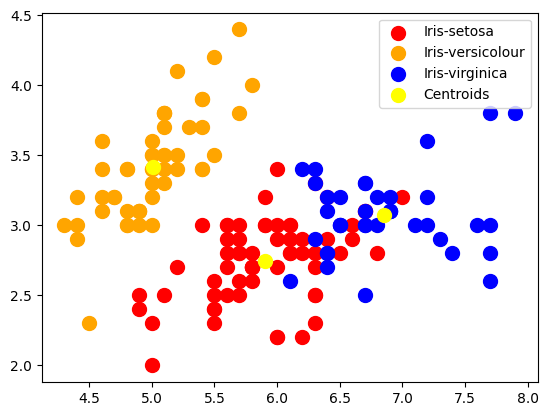

In [31]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

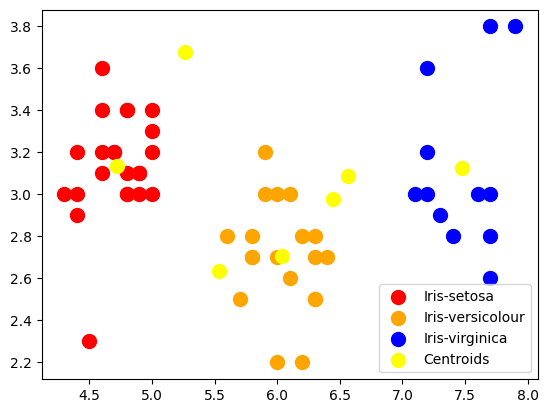

In [33]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [34]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



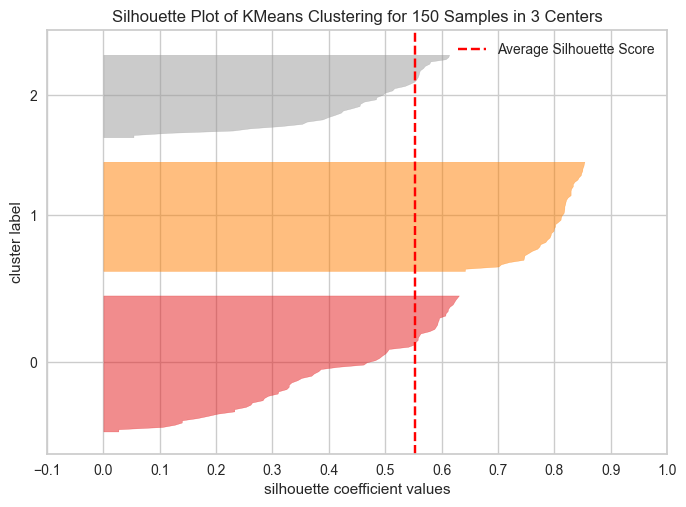

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show() 

c:\Users\neddy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



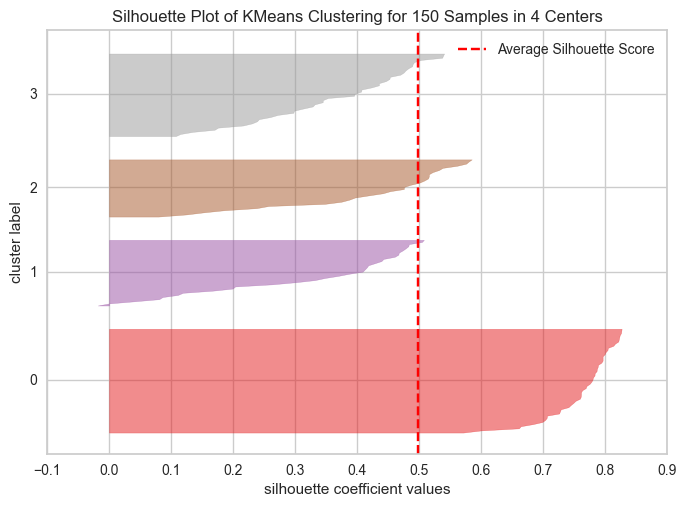

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show() 

In [38]:
import plotly.express as px

fig = px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='PetalLengthCm', size='PetalLengthCm', size_max=18,
              symbol='Species', opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))